# SVM

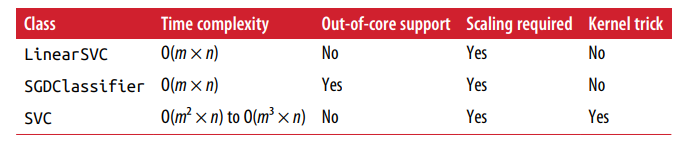

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # tamanho da pétala
y = (iris["target"]==2).astype(np.float64) # iris virginica

In [3]:
X[:5], y[:5]

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2]]),
 array([0., 0., 0., 0., 0.]))

## Linear

A Hinge Loss é uma função de perda do SVM que penaliza previsões erradas e acertos próximos à margem de decisão, ajudando a maximizar a separação entre classes. Isso melhora a robustez e a generalização do modelo

In [4]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")), # C é o termo regularizador, se estiver overfitting é bom tentar reduzir C
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

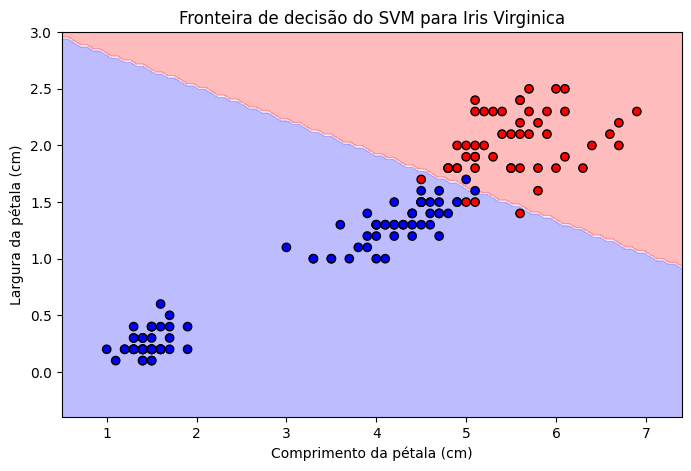

In [6]:
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)
)
X_grid = np.c_[x0.ravel(), x1.ravel()]
y_pred = svm_clf.predict(X_grid).reshape(x0.shape)

# plota os pontos e a fronteira de decisão
plt.figure(figsize=(8, 5))
plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.bwr)  # Área colorida para classes 0 e 1
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors="k")  # Dados reais
plt.xlabel("Comprimento da pétala (cm)")
plt.ylabel("Largura da pétala (cm)")
plt.title("Fronteira de decisão do SVM para Iris Virginica")
plt.show()

### RBF Kernel

In [19]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="rbf", gamma=5, C=10))
 ])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=10, gamma=5))])

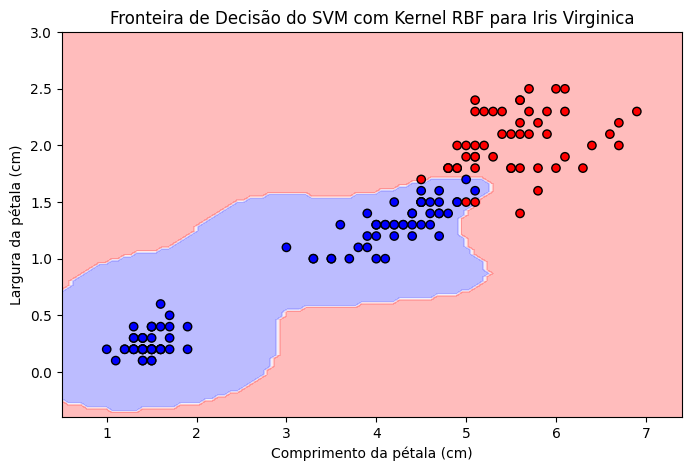

In [20]:
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)
)
X_grid = np.c_[x0.ravel(), x1.ravel()]
y_pred = rbf_kernel_svm_clf.predict(X_grid).reshape(x0.shape)

plt.figure(figsize=(8, 5))
plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.bwr)  # região de decisão do SVM
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors="k")  # dados reais
plt.xlabel("Comprimento da pétala (cm)")
plt.ylabel("Largura da pétala (cm)")
plt.title("Fronteira de Decisão do SVM com Kernel RBF para Iris Virginica")
plt.show()